# Referendum 2013

In [1]:
#import packages from R
#install.packages("readxl")
#install.packages("maptools")
#install.packages("fBasics") #basicStats
#install.packages("plotly")
#install.packages("Hmisc")
install.packages("corrplot") #http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram
library("readxl")
library("maptools")
library("fBasics")
library("plotly")
library("reshape")
library("corrplot")


The downloaded binary packages are in
	/var/folders/3x/cwyr4h2x1sq1zwzrvjb7bt_80000gn/T//Rtmp6q9Uoa/downloaded_packages


Loading required package: sp
Checking rgeos availability: TRUE
Loading required package: timeDate
Loading required package: timeSeries


Rmetrics Package fBasics
Analysing Markets and calculating Basic Statistics
Copyright (C) 2005-2014 Rmetrics Association Zurich
Educational Software for Financial Engineering and Computational Science
Rmetrics is free software and comes with ABSOLUTELY NO WARRANTY.
https://www.rmetrics.org --- Mail to: info@rmetrics.org
Loading required package: ggplot2

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:timeSeries’:

    filter

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout


Attaching package: ‘reshape’

The following object is masked from ‘package:plotly’:

    rename



Importer (load) la base de données 'Referendum.csv'

In [2]:
dat = read.csv("Referendum.csv", header = TRUE, sep = ";")
names(dat)

[1] "Code.du.département"    "Libellé.du.département" "Code.de.la.commune"    
[4] "Libellé.de.la.commune"  "Inscrits"               "Abstentions"           
[7] "Blancs.et.nuls"         "Choix.A"                "Choix.B"

En regardant les noms des attributs de la base et etant donné qu'il s'agit d'une base de donnée d'un référendum en France, on peut faire une description rapide des variables et leur relations (et possibles questions par rapport à leur nature) :
* **Code.du.département** : variable catégorielle //
* **Libellé.du.département** : variable catégorielle  // Cette variable et **Code.du.département** devraient être parfaitement correlationés
* **Code.de.la.commune** : variable catégorielle // Les communes de chaque département sont énumerés 1,2,... ?
* **Libellé.de.la.commune** : variable catégorielle // Cette variable et **Code.de.la.commune** sont parfaitement correlationés. Faire attention à la réponse à dernière question
* **Inscrits** : variable numérique // tous les inscrits sur la liste éléctoral // ce n'est pas l'equivalent des majeurs de 18 qui habitent à la commune : il peut avoir des possibles votants qui habitent dans la commune et qui ne sont pas inscrits et des inscrits qui n'habitent plus dans la commune // On devrait avoir **Inscrits** = **Abstentions** + **Blancs.et.nuls** + **Choix.A** + **Choix.B** 
* **Abstentions** : variable numérique // le nombre d'inscrits qui n'ont pas voté 
* **Blancs.et.nuls** : variable numérique //
* **Choix.A** : variable numérique //
* **Choix.B** : variable numérique //


## Quelques informations initiales sur la base :

* Attributs Catégoriels ?
    * Variables catégorielles : **Code.du.département**, **Libellé.du.département**, **Code.de.la.commune**, **Libellé.de.la.commune**

* Attributs Numériques ?
    * Variables numériques : **Inscrits**, **Abstentions**, **Blancs.et.nuls**, **Choix.A**, **Choix.B**

* Data type ? 
    * Strings : 2 
    * Integers : 7 
    
* Attributs avec des fautes (coquilles/typos) ?
    * 
* Attributs avec des NaN ou vide ?
    * non



In [3]:
#preview de la base
dat[1:5,]

Code.du.département Libellé.du.département Code.de.la.commune
1 1                   AIN                    1                 
2 1                   AIN                    2                 
3 1                   AIN                    4                 
4 1                   AIN                    5                 
5 1                   AIN                    6                 
  Libellé.de.la.commune   Inscrits Abstentions Blancs.et.nuls Choix.A Choix.B
1 L'Abergement-Clémenciat  592       84          9             154     345   
2 L'Abergement-de-Varey    215       36          5              66     108   
3 Ambérieu-en-Bugey       8205     1698        126            2717    3664   
4 Ambérieux-en-Dombes     1152      170         18             280     684   
5 Ambléon                  105       17          1              35      52

In [4]:
#check if there are no typos, only for the categorical variables
#unique(dat$Libellé.du.département)
#unique(dat$Libellé.de.la.commune)

In [5]:
#is there NA values? 
#TODO: print name of variable and #null values (or print a table?) or show only if there is some null value

if(table(sapply(dat$Code.du.département, is.na))[[1]]==nrow(dat) ||
  table(sapply(dat$Libellé.du.département, is.na))[[1]]==nrow(dat)||
  table(sapply(dat$Code.de.la.commune, is.na))[[1]]==nrow(dat) ||
  table(sapply(dat$Libellé.de.la.commune, is.na))[[1]]==nrow(dat)||
  table(sapply(dat$Inscrits, is.na))[[1]]==nrow(dat) ||
  table(sapply(dat$Abstentions, is.na))[[1]]==nrow(dat)||
  table(sapply(dat$Blancs.et.nuls, is.na))[[1]]==nrow(dat) ||
  ttable(sapply(dat$Choix.A, is.na))[[1]]==nrow(dat)||
  table(sapply(dat$Choix.B, is.na))[[1]]==nrow(dat)){  
    print("No NA values") } else { 
    print("At least one NA value") }


[1] "No NA values"


In [35]:
#Data types et résumé des variables
sapply(dat,class)
summary(dat)
length(unique(dat$Code.du.département))
length(unique(dat$Libellé.du.département))
length(unique(dat$Code.de.la.commune))
length(unique(dat$Libellé.de.la.commune))

Code.du.département Libellé.du.département     Code.de.la.commune 
              "factor"               "factor"               "factor" 
 Libellé.de.la.commune               Inscrits            Abstentions 
              "factor"              "integer"              "integer" 
        Blancs.et.nuls                Choix.A                Choix.B 
             "integer"              "integer"              "integer" 
               Valides               Exprimes         Abstentions.pc 
             "integer"              "integer"              "numeric" 
     Blancs.et.nuls.pc             Choix.A.pc             Choix.B.pc 
             "numeric"              "numeric"              "numeric"

 Code.du.département    Libellé.du.département Code.de.la.commune
 62     :  895       PAS DE CALAIS :  895      1      :   91     
 2      :  816       AISNE         :  816      4      :   91     
 80     :  782       SOMME         :  782      13     :   91     
 76     :  744       SEINE MARITIME:  744      27     :   91     
 57     :  730       MOSELLE       :  730      46     :   91     
 14     :  706       CALVADOS      :  706      58     :   91     
 (Other):32118       (Other)       :32118      (Other):36245     
    Libellé.de.la.commune    Inscrits        Abstentions      
 Sainte-Colombe:   14     Min.   :      6   Min.   :     0.0  
 Saint-Sauveur :   12     1st Qu.:    160   1st Qu.:    23.0  
 Beaulieu      :   11     Median :    337   Median :    49.0  
 Saint-Sulpice :   11     Mean   :   1251   Mean   :   256.7  
 Sainte-Marie  :   11     3rd Qu.:    807   3rd Qu.:   120.0  
 Beaumont      :   10     Max.   :1253322   Max.   :248755.0  
 (Other)       :36722          

[1] 107

[1] 107

[1] 908

[1] 34237

In [7]:
#changer le code de la commune d'integer à factor
dat$Code.de.la.commune = as.factor(dat$Code.de.la.commune)

## Analyse des résultats

Qui a gagné l'election? 
* Choix B

In [8]:
sprintf("Choix A a %.2f%% de votes, soit %1.0f voix d un total de %1.0f votes valides", 
        sum(dat$Choix.A)/(sum(dat$Choix.A)+sum(dat$Choix.B))*100, sum(dat$Choix.A),
        (sum(dat$Choix.A)+sum(dat$Choix.B)))
sprintf("Choix B a %.2f%% de votes, soit %1.0f voix d un total de %1.0f votes valides", 
        sum(dat$Choix.B)/(sum(dat$Choix.A)+sum(dat$Choix.B))*100, sum(dat$Choix.B),
        (sum(dat$Choix.A)+sum(dat$Choix.B)))

[1] "Choix A a 43.75% de votes, soit 15699580 voix d un total de 35883209 votes valides"

[1] "Choix B a 56.25% de votes, soit 20183629 voix d un total de 35883209 votes valides"

In [44]:
#Creation des nouvelles variables

dat$Valides = dat$Choix.A + dat$Choix.B
dat$Exprimes = dat$Choix.A + dat$Choix.B + dat$Blancs.et.nuls
dat$Abstentions.pc = dat$Abstentions/(dat$Inscrits)*100
dat$Blancs.et.nuls.pc = dat$Blancs.et.nuls/(dat$Exprimes)*100
dat$Choix.A.pc = dat$Choix.A/dat$Valides*100
dat$Choix.B.pc = dat$Choix.B/dat$Valides*100

write.csv(dat, file = "dat.csv")

#variables par departament
departements = unique(dat$Code.du.département)

Choix.A.dep = numeric()
Choix.B.dep = numeric()
Inscrits.dep = numeric()
Valides.dep = numeric()
Exprimes.dep = numeric()
Abstentions.dep = numeric()
Blancs.et.nuls.dep = numeric()
libelle.departement = character()
for(i in departements){ 
    Choix.A.dep[i] = sum(dat$Choix.A[dat$Code.du.département==i])
    Choix.B.dep[i] = sum(dat$Choix.B[dat$Code.du.département==i])
    Inscrits.dep[i] = sum(dat$Inscrits[dat$Code.du.département==i])
    Valides.dep[i] = sum(dat$Valides[dat$Code.du.département==i])
    Exprimes.dep[i] = sum(dat$Exprimes[dat$Code.du.département==i])
    Abstentions.dep[i] = sum(dat$Abstentions[dat$Code.du.département==i])
    Blancs.et.nuls.dep[i] = sum(dat$Blancs.et.nuls[dat$Code.du.département==i])
    lib.dep = dat$Libellé.du.département[dat$Code.du.département==i]
    libelle.departement[i] = as.character(lib.dep[[1]])
 }
dat.dep = data.frame("Departements" = departements,"Libelle.de.departement" = libelle.departement,
                     "Inscrits" = Inscrits.dep,"Valides" = Valides.dep,
                     "Exprimes" = Exprimes.dep, "Abstentions" = Abstentions.dep, 
                     "Blancs.et.nuls" = Blancs.et.nuls.dep, 
                     "Choix.A" = Choix.A.dep,"Choix.B" = Choix.B.dep)

dat.dep$Valides = dat.dep$Choix.A + dat.dep$Choix.B
dat.dep$Exprimes = dat.dep$Choix.A + dat.dep$Choix.B + dat.dep$Blancs.et.nuls
dat.dep$Abstentions.pc = dat.dep$Abstentions/(dat.dep$Inscrits)*100
dat.dep$Blancs.et.nuls.pc = dat.dep$Blancs.et.nuls/(dat.dep$Exprimes)*100
dat.dep$Choix.A.pc = dat.dep$Choix.A/dat.dep$Valides*100
dat.dep$Choix.B.pc = dat.dep$Choix.B/dat.dep$Valides*100

write.csv(dat.dep, file = "dat_dep.csv")


In [10]:
#Statistiques basiques
#abstentions à niveau National
print("Summary % Abstentions (commune/departement)")
summary(dat$Abstentions.pc)
summary(dat.dep$Abstentions.pc)
#Blancs et nuls 
print("Summary % Blancs et nuls (commune/departement)")
summary(dat$Blancs.et.nuls.pc)
summary(dat.dep$Blancs.et.nuls.pc)
#Choix A
print("Summary % Choix A (commune/departement)")
summary(dat$Choix.A.pc)
summary(dat.dep$Choix.A.pc)
#Choix B
print("Summary % Choix B (commune/departement)")
summary(dat$Choix.B.pc)
summary(dat.dep$Choix.B.pc)
#TODO las mismas estadisticas pero para los departaments, se puede usar ifelse?

[1] "Summary % Abstentions (commune/departement)"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   12.24   14.82   15.43   17.85   83.89 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.86   16.69   17.94   21.05   20.15   63.51 

[1] "Summary % Blancs et nuls (commune/departement)"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.299   1.875   2.034   2.557 100.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.605   1.787   1.945   2.134   2.178   7.877 

[1] "Summary % Choix A (commune/departement)"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   32.08   38.94   39.46   46.27  100.00       3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.83   39.93   43.05   43.95   47.87   65.56 

[1] "Summary % Choix B (commune/departement)"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   53.73   61.06   60.54   67.92  100.00       3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34.44   52.13   56.95   56.05   60.07   69.17 

Nous pouvons voir qu'il y a des valeurs NA dans les variables **Choix.A.pc** et **Choix.B.pc**. Il est du à une division par zero. On affiche les enregistrements qui y correspond

In [11]:
dat[dat$Valides==0,]

Code.du.département Libellé.du.département Code.de.la.commune
3520  10                  AUBE                   298               
11953 31                  HAUTE GARONNE          81                
16835 43                  HAUTE LOIRE            122               
      Libellé.de.la.commune Inscrits Abstentions Blancs.et.nuls Choix.A Choix.B
3520  Pont-sur-Seine        719      172         547            0       0      
11953 Bourg-d'Oueil          21        1          20            0       0      
16835 Lissac                236       27         209            0       0      
      Valides Exprimes Abstentions.pc Blancs.et.nuls.pc Choix.A.pc Choix.B.pc
3520  0       547      23.922114      100               NaN        NaN       
11953 0        20       4.761905      100               NaN        NaN       
16835 0       209      11.440678      100               NaN        NaN

Nous faisons des barplots pour voir les communes les plus peuplées with regards to choix A et B

Using Libellé.de.la.commune as id variables


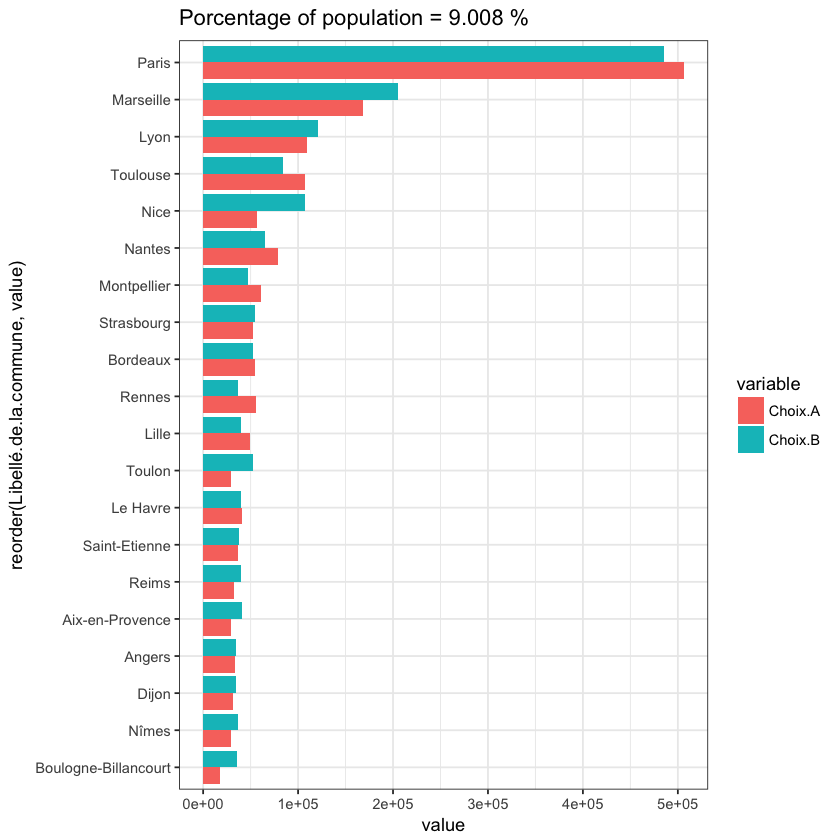

In [12]:
dat.ordered <- dat[order(dat$Choix.B,decreasing = T),]
dat.ordered.plot <-dat.ordered[,c("Libellé.de.la.commune","Choix.A","Choix.B")]
until = 20
dat.ordered.plot.long <- melt(dat.ordered.plot[1:until,])

pc = sum(dat.ordered$Valides[1:until])/sum(dat.ordered$Valides)*100

p <- ggplot(data = dat.ordered.plot.long,aes(x=reorder(Libellé.de.la.commune,value), y=value,fill=variable))
p    + theme_bw() + geom_bar(stat="identity",position="dodge") + coord_flip() + 
ggtitle(sprintf("Porcentage of population = %.3f %%",pc))


Using Libellé.de.la.commune as id variables


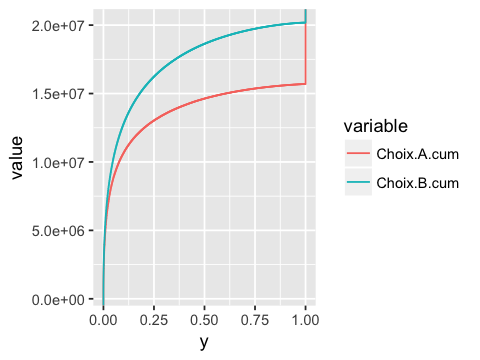

In [13]:
#cumulative
dat.ordered.plot$Choix.A.cum <- cumsum(dat.ordered.plot$Choix.A)
dat.ordered.plot$Choix.B.cum <- cumsum(dat.ordered.plot$Choix.B)

dat.ordered.plot2 <-dat.ordered.plot[,c("Libellé.de.la.commune","Choix.A.cum","Choix.B.cum")]
#until = 280
dat.ordered.plot2.long <- melt(dat.ordered.plot2[,])

options(repr.plot.width=4, repr.plot.height=3)
p2 <- ggplot(data = dat.ordered.plot2.long,aes(x=value),color=variable)
#p2 + theme_bw() + geom_bar(stat="identity",position="dodge")
p2 + stat_ecdf(aes(colour=variable),geom="step") + coord_flip() #+
# stat_bin(data=subset(dat.ordered.plot.long,variable=="Choix.B"),aes(y=cumsum(..count..)),geom="step") 

#p3 <- ggplot(data = dat.ordered.plot2.long,aes(x=reorder(Libellé.de.la.commune,value), y=value,group=variable,
                                           #    colour=variable))
#p3    + theme_bw() + geom_line(stat="identity",position="dodge") + 
#ggtitle(sprintf("test = %.3f %%",pc)) +  # theme(axis.title.x=element_blank(),
       # axis.text.x=element_blank(),
       # axis.ticks.x=element_blank())
#theme(axis.text.x = element_text(angle = 90, hjust = 1,size=5)) #---> to show the xlabel

Nous faisons un check des la relation logique des variables numeriques : Inscrits = Abstentions + Blancs.et.nuls + Choix.A + Choix.B

In [14]:
table(dat$Inscrits == dat$Abstentions + dat$Blancs.et.nuls + dat$Choix.A + dat$Choix.B)


 TRUE 
36791 

Nous analisons la distribution des variables numeriques

* Distributions des Porcentages par departament et par commune de la variable Abstentions par rapport aux inscrits
* Distributions des Porcentages par departament et par commune de la variable Blancs.et.nuls par rapport aux votes 
* Distribution des Porcentages par departament et par commune des variables Choix.A et Choix.B par rapport aux votes valides

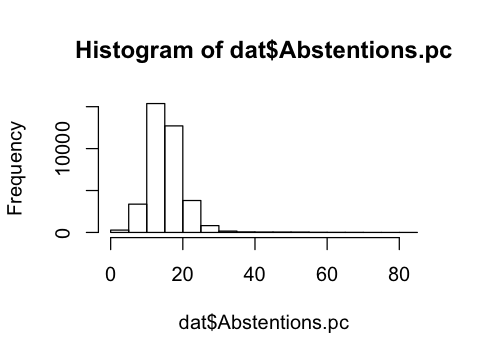

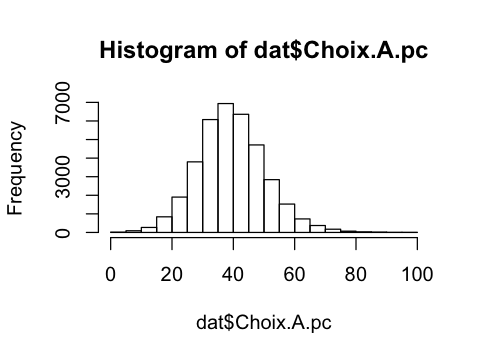

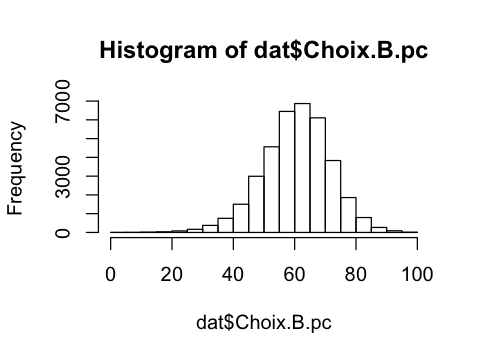

In [15]:
#TODO ver como se hacen los histogramas de elecciones (lemonde par ex)
#TODO graficos bonitos
hist(dat$Abstentions.pc)
hist(dat$Choix.A.pc)
hist(dat$Choix.B.pc)

Importer (load) les autres bases de données :
* filo-revenu-pauvrete-menage-2013 : France métropolitaine - Communes 
    * revenu-communes.xls
    * revenu-departemens.xls
* base-cc-evol-struct-pop-2013 : Chiffres clés - Évolution et structure de la population
    * pop.xls
    
[this file](notebook-ref-other-info.ipynb)

## Quelles variables ?
Nous choisisons quelques variables de chaque base de données aditionnelle
* revenu-departements:
    * MED13 ; Médiane du niveau vie
    * RD13 ; Rapport inter-décile 9e décile/1er decile
    * TP6013 ; Taux de pauvreté-Ensemble
    * TP60AGE513 ; Taux de pauvreté-60 à 74 ans
    
* pop:
    * P13_POP ; Population
    * P13_POPH ; Nombre total d'hommes
    * C13_POP15P_CS1 ; Nombre d'hommes de 15 ans ou plus Agriculteurs exploitants
    * C13_POP15P_CS3 ; Nombre d'hommes de 15 ans ou plus Cadres et Professions intellectuelles supérieures

In [47]:
library("readxl")

dat_rev_communes = read_excel("revenu-communes.xls") 
dat_rev_departements = read_excel("revenu-departements.xls") 
dat_pop = read_excel("pop.xls") 

#dat_pop group by DEP

#variables par departament
departements_pop = unique(dat_pop$DEP)

P13_POP.dep = numeric()
P13_POPH.dep = numeric()
P13_POP0014.dep = numeric() 
P13_POP1529.dep = numeric()
P13_POP3044.dep = numeric()
P13_POP4559.dep = numeric()
P13_POP6074.dep = numeric()
P13_POP7589.dep = numeric()
P13_POP90P.dep = numeric()
C13_POP15P_CS1.dep = numeric() #agriculteur
C13_POP15P_CS3.dep = numeric() #cadre
for(i in departements_pop){ 
    P13_POP.dep[i] = sum(round(dat_pop$P13_POP[dat_pop$DEP == i]))
    P13_POPH.dep[i] = sum(round(dat_pop$P13_POPH[dat_pop$DEP == i]))
    P13_POP0014.dep[i] = sum(round(dat_pop$P13_POP0014[dat_pop$DEP == i]))
    P13_POP1529.dep[i] = sum(round(dat_pop$P13_POP1529[dat_pop$DEP == i]))
    P13_POP3044.dep[i] = sum(round(dat_pop$P13_POP3044[dat_pop$DEP == i]))
    P13_POP4559.dep[i] = sum(round(dat_pop$P13_POP4559[dat_pop$DEP == i]))
    P13_POP6074.dep[i] = sum(round(dat_pop$P13_POP6074[dat_pop$DEP == i]))
    P13_POP7589.dep[i] = sum(round(dat_pop$P13_POP7589[dat_pop$DEP == i]))
    P13_POP90P.dep[i] = sum(round(dat_pop$P13_POP90P[dat_pop$DEP == i]))
    C13_POP15P_CS1.dep[i] = sum(round(dat_pop$C13_POP15P_CS1[dat_pop$DEP == i]))
    C13_POP15P_CS3.dep[i] = sum(round(dat_pop$C13_POP15P_CS3[dat_pop$DEP == i]))
 }
dat.dep_pop = data.frame("Departements" = departements_pop,"P13_POP" = P13_POP.dep,
                        "P13_POPH" = P13_POPH.dep, "P13_POP0014" = P13_POP0014.dep,
                         "P13_POP1529" = P13_POP1529.dep, "P13_POP3044" = P13_POP3044.dep,
                         "P13_POP4559" = P13_POP4559.dep, "P13_POP6074" = P13_POP6074.dep, 
                         "P13_POP7589" = P13_POP7589.dep, "P13_POP90P" = P13_POP90P.dep,
                         "C13_POP15P_CS1" = C13_POP15P_CS1.dep,
                        "C13_POP15P_CS3" = C13_POP15P_CS3.dep)


#merge data
levels(dat.dep_pop$Departements)[levels(dat.dep_pop$Departements)=="01"] <- "1"
levels(dat.dep_pop$Departements)[levels(dat.dep_pop$Departements)=="02"] <- "2"
levels(dat.dep_pop$Departements)[levels(dat.dep_pop$Departements)=="03"] <- "3"
levels(dat.dep_pop$Departements)[levels(dat.dep_pop$Departements)=="04"] <- "4"
levels(dat.dep_pop$Departements)[levels(dat.dep_pop$Departements)=="05"] <- "5"
levels(dat.dep_pop$Departements)[levels(dat.dep_pop$Departements)=="06"] <- "6"
levels(dat.dep_pop$Departements)[levels(dat.dep_pop$Departements)=="07"] <- "7"
levels(dat.dep_pop$Departements)[levels(dat.dep_pop$Departements)=="08"] <- "8"
levels(dat.dep_pop$Departements)[levels(dat.dep_pop$Departements)=="09"] <- "9"
dat_rev_departements$CODGEO[1:10] <- as.integer(dat_rev_departements$CODGEO[1:10])
dat_rev_departements$CODGEO <- as.factor(dat_rev_departements$CODGEO)
dat_rev_departements$CODGEO <- as.factor(dat_rev_departements$CODGEO)

deps.commun = intersect(dat_rev_departements$CODGEO,dat.dep$Departements)
deps.commun2 = intersect(dat.dep_pop$Departements,dat.dep$Departements)


MED13 = numeric()
RD13 = numeric()
TP6013 = numeric()
TP60AGE513 = numeric()
P13_POP = numeric()
P13_POPH = numeric()
P13_POP0014 = numeric() 
P13_POP1529 = numeric()
P13_POP3044 = numeric()
P13_POP4559 = numeric()
P13_POP6074 = numeric()
P13_POP7589 = numeric()
P13_POP90P = numeric()
C13_POP15P_CS1 = numeric() #agriculteur
C13_POP15P_CS2 = numeric() #artisans, comm, chef entr
C13_POP15P_CS3 = numeric() #cadre
C13_POP15P_CS4 = numeric() #prof interm
C13_POP15P_CS5 = numeric() #employes
C13_POP15P_CS6 = numeric() #ouvriers
C13_POP15P_CS7 = numeric() #retraites
C13_POP15P_CS8 = numeric() #autres
for(i in deps.commun){
    MED13[i] <- dat_rev_departements$MED13[dat_rev_departements$CODGEO == i] 
    RD13[i] <- dat_rev_departements$RD13[dat_rev_departements$CODGEO == i] 
    TP6013[i] <- dat_rev_departements$TP6013[dat_rev_departements$CODGEO == i] 
    TP60AGE513[i] <- dat_rev_departements$TP60AGE513[dat_rev_departements$CODGEO == i]
    P13_POP[i] <- dat.dep_pop$P13_POP[dat.dep_pop$Departements == i]
    P13_POPH[i] <- dat.dep_pop$P13_POPH[dat.dep_pop$Departements == i] 
    P13_POP0014[i] <- dat.dep_pop$P13_POP0014[dat.dep_pop$Departements == i] 
    P13_POP1529[i] <- dat.dep_pop$P13_POP1529[dat.dep_pop$Departements == i]
    P13_POP3044[i] <- dat.dep_pop$P13_POP3044[dat.dep_pop$Departements == i]
    P13_POP4559[i] <- dat.dep_pop$P13_POP4559[dat.dep_pop$Departements == i]
    P13_POP6074[i] <- dat.dep_pop$P13_POP6074[dat.dep_pop$Departements == i]
    P13_POP7589[i] <- dat.dep_pop$P13_POP7589[dat.dep_pop$Departements == i]
    P13_POP90P[i] <- dat.dep_pop$P13_POP90P[dat.dep_pop$Departements == i]
    C13_POP15P_CS1[i] <- dat.dep_pop$C13_POP15P_CS1[dat.dep_pop$Departements == i] 
    C13_POP15P_CS3[i] <- dat.dep_pop$C13_POP15P_CS3[dat.dep_pop$Departements == i] 
}

dat.dep = dat.dep[is.element(dat.dep$Departements,deps.commun),]

dat.dep$P13_POPH.pc = P13_POPH/P13_POP*100
dat.dep$P13_POP0014.pc = P13_POP0014/P13_POP*100 
dat.dep$P13_POP1529.pc = P13_POP1529/P13_POP*100
dat.dep$P13_POP3044.pc = P13_POP3044/P13_POP*100
dat.dep$P13_POP4559.pc = P13_POP4559/P13_POP*100
dat.dep$P13_POP6074.pc = P13_POP6074/P13_POP*100
dat.dep$P13_POP7589.pc = P13_POP7589/P13_POP*100
dat.dep$P13_POP90P.pc = P13_POP90P/P13_POP*100
dat.dep$C13_POP15P_CS1.pc = C13_POP15P_CS1/P13_POP*100
dat.dep$C13_POP15P_CS3.pc = C13_POP15P_CS3/P13_POP*100

dat.dep$MED13 = MED13
dat.dep$RD13 = RD13
dat.dep$MED13.n = MED13/max(MED13)
dat.dep$RD13.n = RD13/max(RD13)
dat.dep$TP6013 = TP6013
dat.dep$TP60AGE513 = TP60AGE513
dat.dep$P13_POP = P13_POP

write.csv(dat.dep, file = "dat_dep2.csv")

[1] "Departements"           "Libelle.de.departement" "Inscrits"              
 [4] "Valides"                "Exprimes"               "Abstentions"           
 [7] "Blancs.et.nuls"         "Choix.A"                "Choix.B"               
[10] "Abstentions.pc"         "Blancs.et.nuls.pc"      "Choix.A.pc"            
[13] "Choix.B.pc"             "P13_POPH.pc"            "P13_POP0014.pc"        
[16] "P13_POP1529.pc"         "P13_POP3044.pc"         "P13_POP4559.pc"        
[19] "P13_POP6074.pc"         "P13_POP7589.pc"         "P13_POP90P.pc"         
[22] "C13_POP15P_CS1.pc"      "C13_POP15P_CS3.pc"      "MED13"                 
[25] "RD13"                   "TP6013"                 "TP60AGE513"            
[28] "P13_POP"

Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“"addcolorlabel" n'est pas un paramètre graphique”Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“"addcolorlabel" n'est pas un paramètre graphique”Warning message in title(title, ...):
“"addcolorlabel" n'est pas un paramètre graphique”

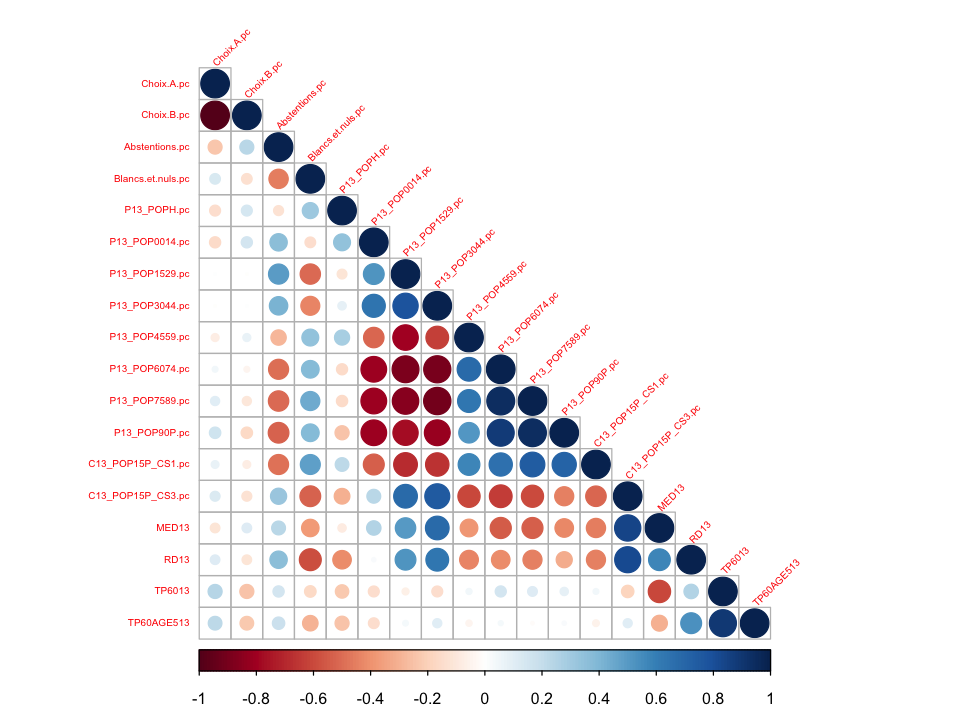

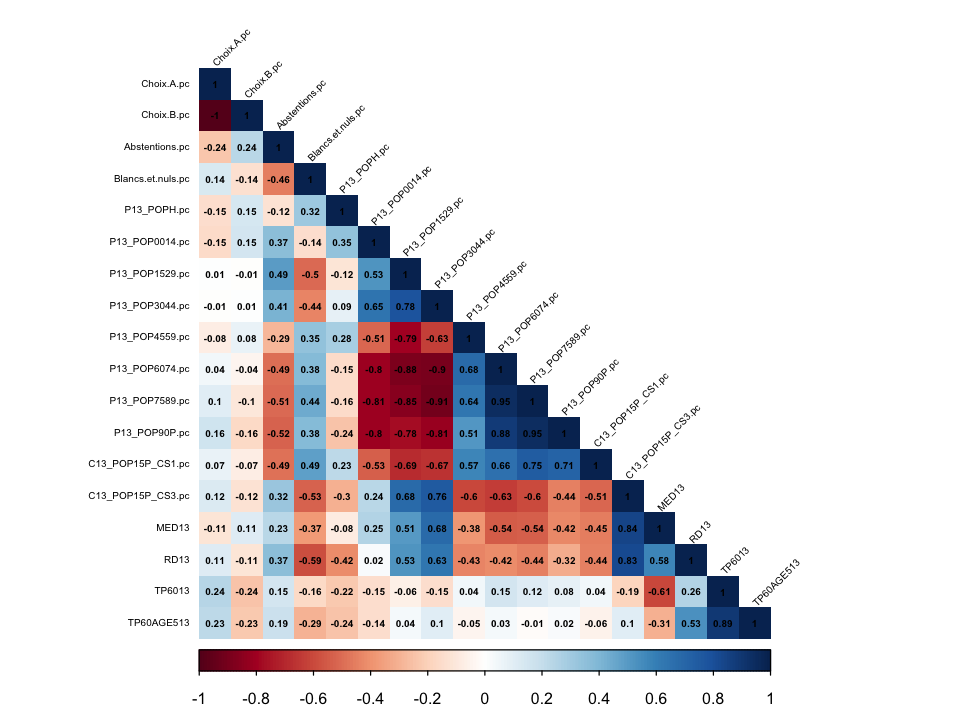

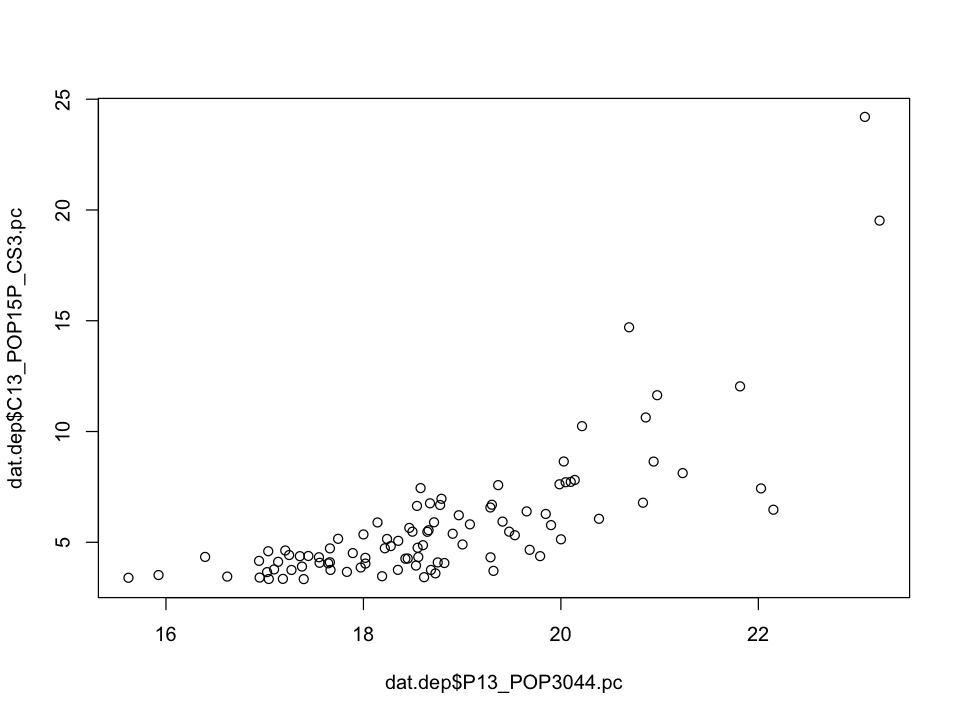

In [17]:
# https://www.kaggle.com/joelwilson/election-correlation-matrix/notebook

chosen = c("Choix.A.pc","Choix.B.pc","Abstentions.pc","Blancs.et.nuls.pc","P13_POPH.pc",
                   "P13_POP0014.pc","P13_POP1529.pc","P13_POP3044.pc","P13_POP4559.pc",
                   "P13_POP6074.pc","P13_POP7589.pc","P13_POP90P.pc","C13_POP15P_CS1.pc",
                  "C13_POP15P_CS3.pc","MED13","RD13","TP6013","TP60AGE513")
C = cor(dat.dep[,chosen], use = "complete.obs")
names(dat.dep)
options(repr.plot.width=8, repr.plot.height=6)
corrplot(C, type="lower",number.cex = 0.4,tl.srt=45, tl.cex = 0.5) #, order="hclust"
corrplot(C, type="lower", method="shade", shade.col=NA, tl.col="black", tl.srt=45, 
         addCoef.col="black", addcolorlabel="no",number.cex = 0.5, tl.cex = 0.5)
#help("text")
#para hacer como en la version final
#http://www.sthda.com/english/wiki/ggplot2-easy-way-to-mix-multiple-graphs-on-the-same-page
    plot(dat.dep$P13_POP3044.pc,dat.dep$C13_POP15P_CS3.pc)

# MAPS


http://professionnels.ign.fr/geofla#tab-3 <-- MAPS

In [18]:
#install.packages(c("plyr", "ggplot2","rgeos", "maptools","rgdal","gpclib"))
library(rgdal)
library(rgeos)
library(maptools)
library(gpclib) 
departements<-readShapeSpatial("./map/GEOFLA_1-1_SHP_LAMB93_FR-ED131/GEOFLA/DEPARTEMENT.SHP")
#summary(departements)
#plot(departements,col=as.numeric(departements$CODE_DEPT))

rgdal: version: 1.2-8, (SVN revision 663)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.2, released 2016/10/24
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.3/Resources/library/rgdal/gdal
 Loaded PROJ.4 runtime: Rel. 4.9.1, 04 March 2015, [PJ_VERSION: 491]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.3/Resources/library/rgdal/proj
 Linking to sp version: 1.2-5 

Attaching package: ‘rgdal’

The following object is masked from ‘package:fBasics’:

    getDescription

rgeos version: 0.3-23, (SVN revision 546)
 GEOS runtime version: 3.4.2-CAPI-1.8.2 r3921 
 Linking to sp version: 1.2-4 
 Polygon checking: TRUE 

General Polygon Clipper Library for R (version 1.5-5)
	Type 'class ? gpc.poly' for help

Attaching package: ‘gpclib’

The following objects are masked from ‘package:rgeos’:

    append.poly, area.poly, get.bbox, get.pts, read.polyfile,
    scale.poly, triangulate, tristrip,

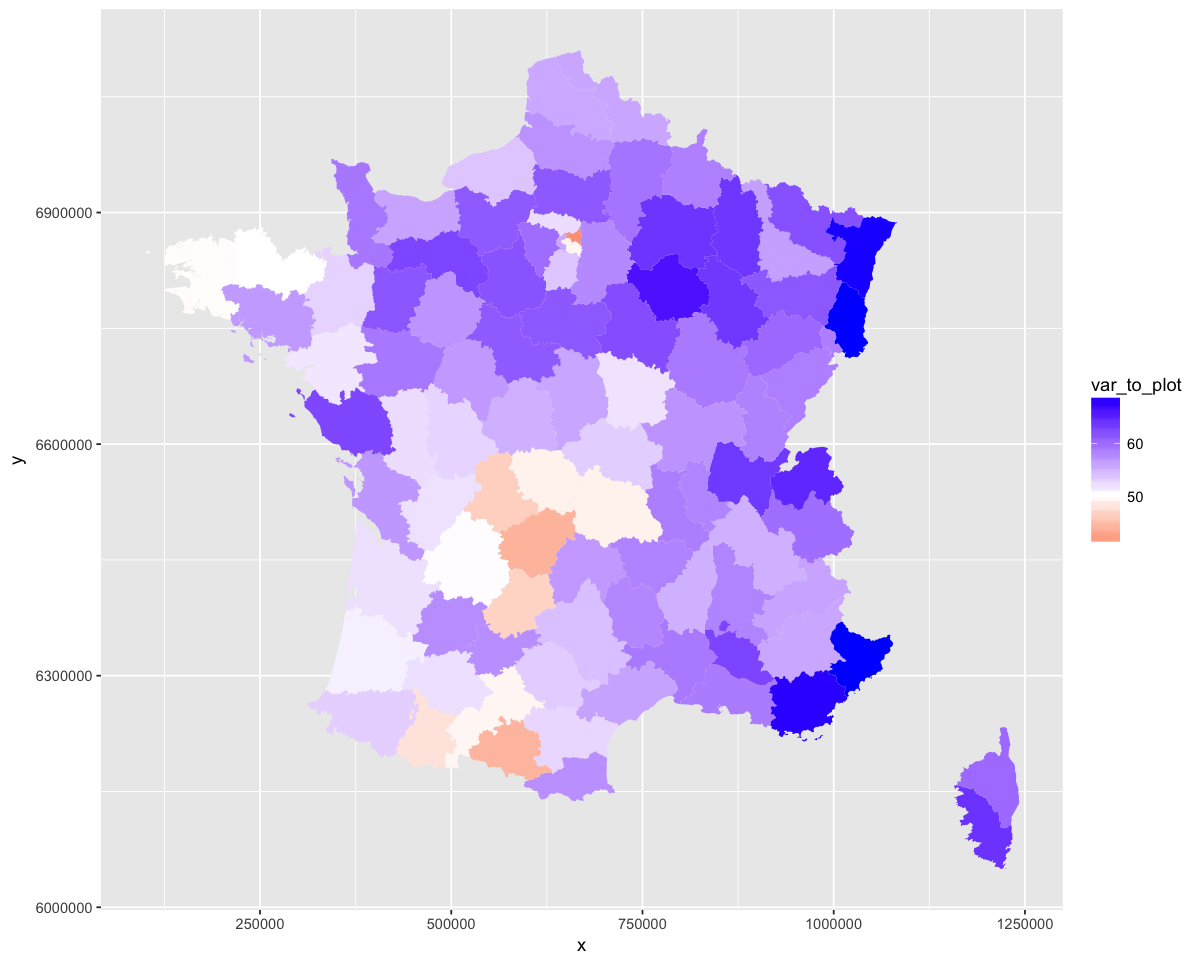

In [19]:
levels(departements$CODE_DEPT)[levels(departements$CODE_DEPT)=="01"] <- "1"
levels(departements$CODE_DEPT)[levels(departements$CODE_DEPT)=="02"] <- "2"
levels(departements$CODE_DEPT)[levels(departements$CODE_DEPT)=="03"] <- "3"
levels(departements$CODE_DEPT)[levels(departements$CODE_DEPT)=="04"] <- "4"
levels(departements$CODE_DEPT)[levels(departements$CODE_DEPT)=="05"] <- "5"
levels(departements$CODE_DEPT)[levels(departements$CODE_DEPT)=="06"] <- "6"
levels(departements$CODE_DEPT)[levels(departements$CODE_DEPT)=="07"] <- "7"
levels(departements$CODE_DEPT)[levels(departements$CODE_DEPT)=="08"] <- "8"
levels(departements$CODE_DEPT)[levels(departements$CODE_DEPT)=="09"] <- "9"

abstentions_color = gray(dat.dep$Abstentions.pc/max(dat.dep$Abstentions.pc))
choix.a_color = dat.dep$Choix.A.pc/max(dat.dep$Choix.A.pc)


#plot(departements,col=abstentions_color)
departements.ggplot = fortify(departements,region = "CODE_DEPT")
var_to_plot = dat.dep$Choix.B.pc
options(repr.plot.width=10, repr.plot.height=8)
ggplot() + geom_map(data = dat.dep, aes(map_id = Departements,
                                       fill = var_to_plot),
                   map = departements.ggplot) + expand_limits(x = departements.ggplot$long, y = departements.ggplot$lat)+
scale_fill_gradient2(low = "red", 
    mid = "white", midpoint = 50,#median(var_to_plot),
                     high = "blue", limits = c(min(var_to_plot), max(var_to_plot)))

In [20]:
#https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python
chosen_pca = c("Abstentions.pc","Blancs.et.nuls.pc","P13_POPH.pc",
                   "P13_POP0014.pc","P13_POP1529.pc","P13_POP3044.pc","P13_POP4559.pc",
                   "P13_POP6074.pc","P13_POP7589.pc","P13_POP90P.pc","C13_POP15P_CS1.pc",
                  "C13_POP15P_CS3.pc","MED13","RD13","TP6013","TP60AGE513")
train = sample(1:nrow(dat.dep),nrow(dat.dep)*(2/3),replace=F)
train = sort(train)
prin_comp <- prcomp(dat.dep[train,chosen_pca], scale. = T)

In [21]:
prin_comp$rotation


PC1         PC2          PC3          PC4         
Abstentions.pc     0.20466312 -0.205156184 -0.007197403 -0.167701377
Blancs.et.nuls.pc -0.20167296  0.142156172  0.321131003  0.098192763
P13_POPH.pc       -0.01363431  0.186047043  0.566614795  0.485799039
P13_POP0014.pc     0.27963269  0.022189877  0.348020919 -0.008868721
P13_POP1529.pc     0.30541394 -0.013986214  0.031406451 -0.253403416
P13_POP3044.pc     0.31940679  0.033125196  0.068442530  0.239540500
P13_POP4559.pc    -0.26792550 -0.009280111 -0.036013582  0.350074294
P13_POP6074.pc    -0.32637798 -0.017672794 -0.157308983 -0.011830732
P13_POP7589.pc    -0.32891901 -0.005750153 -0.170787945 -0.008820650
P13_POP90P.pc     -0.31203867  0.010836681 -0.242728397  0.038917841
C13_POP15P_CS1.pc -0.28021591  0.027442215  0.019416661  0.259741005
C13_POP15P_CS3.pc  0.27428428  0.086433941 -0.328557569  0.252711905
MED13              0.21844758  0.351370495 -0.318448996  0.298332454
RD13               0.23771218 -0.216369801 -0.329045907  0.405163346
TP6013            -0.03923511 -0.613276274  0.126321967  0.019331486
TP60AGE513         0.01952352 -0.588341759  0.029790264  0.308894405
                  PC5         PC6          PC7         PC8          
Abstentions.pc     0.68092666  0.474082618  0.41599004  0.0344354702
Blancs.et.nuls.pc -0.44043123  0.744789142  0.15328307 -0.1488128388
P13_POPH.pc        0.21065101 -0.253929469  0.15010634 -0.2992111952
P13_POP0014.pc    -0.01445943  0.058552921 -0.18985768  0.6743023921
P13_POP1529.pc    -0.10265829 -0.198890008  0.30810821 -0.4873926437
P13_POP3044.pc    -0.11499567  0.054171811 -0.02739315  0.0445962818
P13_POP4559.pc     0.43446358  0.099914483 -0.38838742 -0.1293170217
P13_POP6074.pc     0.07437725  0.061996177 -0.15419203 -0.0392816280
P13_POP7589.pc    -0.02748388  0.035344436  0.12784084  0.0324600839
P13_POP90P.pc     -0.10315632 -0.022552197  0.21745796  0.0782815636
C13_POP15P_CS1.pc  0.02519820 -0.237481145  0.60908012  0.3860420869
C13_POP15P_CS3.pc -0.16232238 -0.002266351  0.19383060  0.0866269939
MED13              0.07470512  0.123522488 -0.02722485  0.0007667101
RD13              -0.08167532  0.138101988 -0.02835016 -0.1014265704
TP6013            -0.09468295 -0.060098226 -0.02537943 -0.0251660300
TP60AGE513        -0.14186723  0.014349661  0.01444045 -0.0039838305
                  PC9         PC10        PC11        PC12        PC13       
Abstentions.pc     0.13128628  0.02827777 -0.06463954 -0.01670345  0.03760582
Blancs.et.nuls.pc -0.11986837 -0.10077323  0.06503277 -0.01679768 -0.03761410
P13_POPH.pc        0.40758992 -0.01916586  0.08363460  0.06316300  0.08550201
P13_POP0014.pc     0.07582282 -0.16722151  0.17523439  0.24513603 -0.15264300
P13_POP1529.pc    -0.26486802 -0.15882232  0.08067526  0.14714695 -0.25303912
P13_POP3044.pc    -0.16992764  0.42833173 -0.55458902 -0.14645428  0.37452366
P13_POP4559.pc    -0.48880538 -0.34226836 -0.15971723  0.12428151 -0.03419675
P13_POP6074.pc     0.28672904  0.15840866  0.22259053 -0.50494480 -0.12847677
P13_POP7589.pc     0.21831060 -0.02387454  0.03653096  0.15746164  0.32999554
P13_POP90P.pc      0.25128736 -0.02321151 -0.36845471  0.59946941 -0.08664449
C13_POP15P_CS1.pc -0.44705746  0.11081662  0.15963474 -0.17796321 -0.07095449
C13_POP15P_CS3.pc  0.17982918 -0.66587050 -0.12328114 -0.31666628  0.19478194
MED13              0.05882275  0.03054873  0.17505921  0.06775715 -0.28128851
RD13              -0.04640919  0.31257008  0.47350696  0.28666870  0.13258356
TP6013            -0.04523523 -0.23083581  0.22366041  0.04885532  0.39452874
TP60AGE513         0.16024424  0.03301771 -0.28653724 -0.12875705 -0.57693554
                  PC14        PC15         PC16         
Abstentions.pc    -0.03554979  0.005332986 -8.759137e-05
Blancs.et.nuls.pc -0.03838711 -0.009882597  2.230001e-04
P13_POPH.pc       -0.04046020  0.028375689  5.545394e-04
P13_POP0014.pc    -0.04787428  0.072291886 -3.878401e-01
P13_POP1529.pc    -0.04327690  0.005529026 -5.189184e-01
P13_

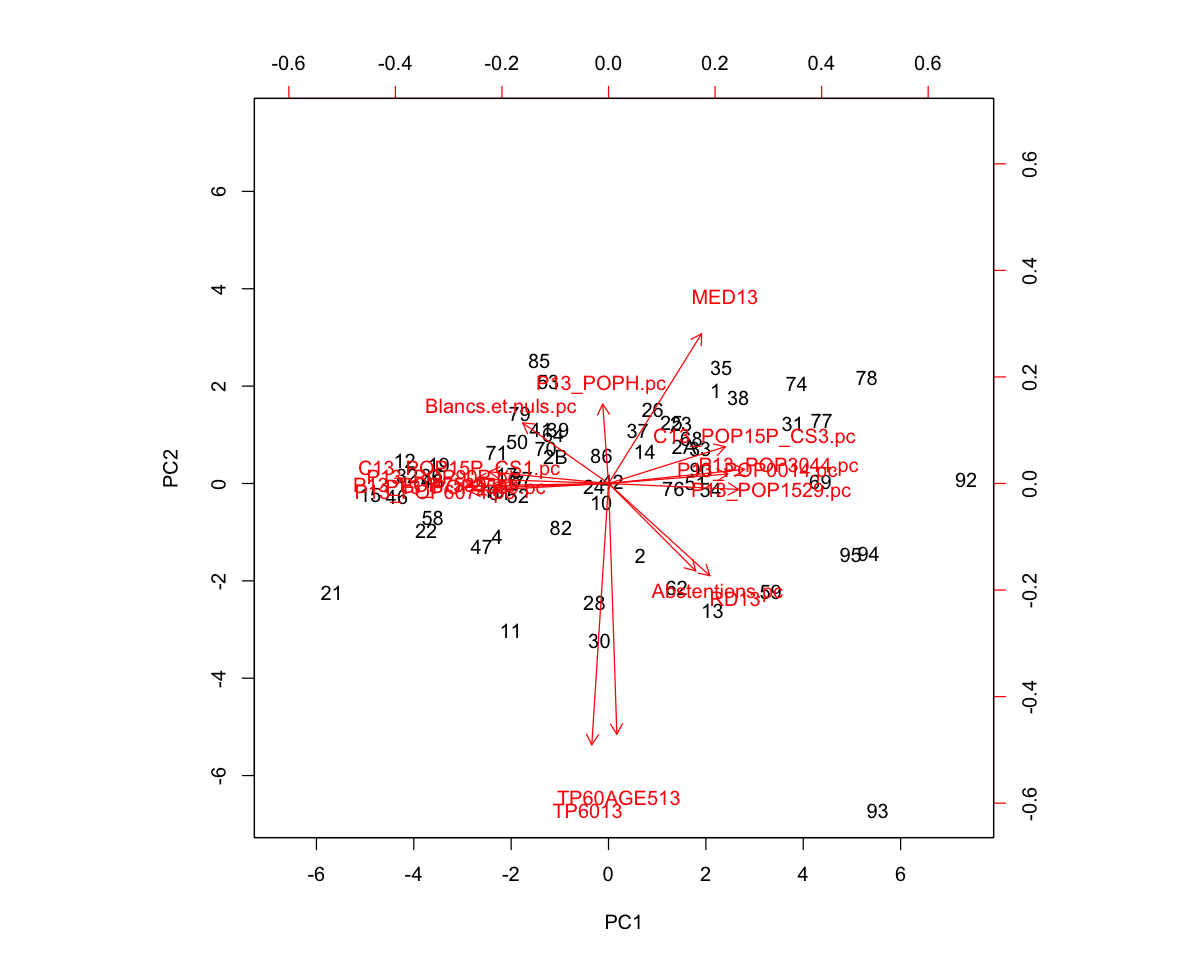

In [22]:
biplot(prin_comp, scale = 0)

[1] 5.324072e-01 1.552036e-01 1.067228e-01 6.485715e-02 4.367689e-02
 [6] 2.962505e-02 2.719061e-02 1.364914e-02 1.033076e-02 5.835000e-03
[11] 4.447599e-03 2.579258e-03 1.929598e-03 1.002160e-03 5.430584e-04
[16] 5.524720e-08

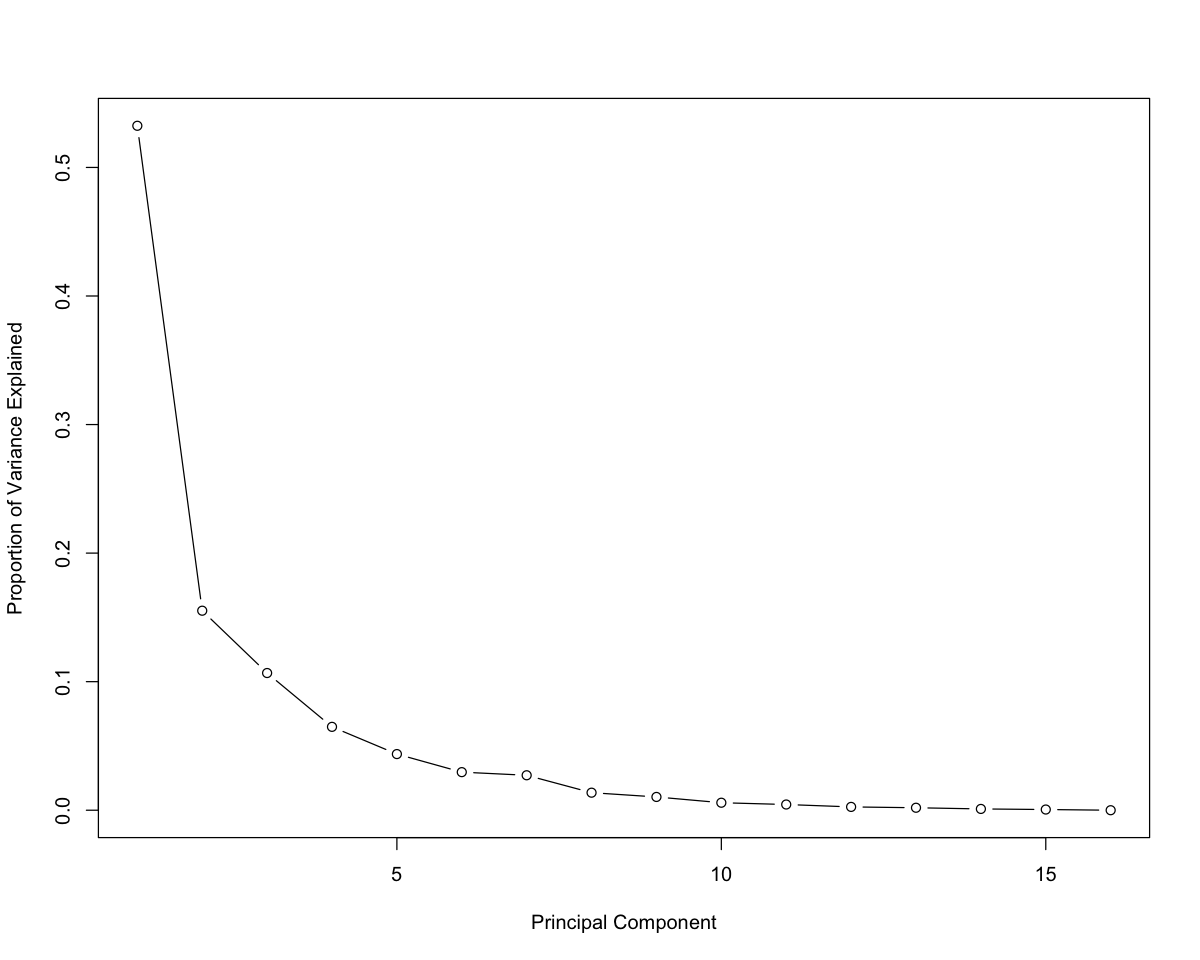

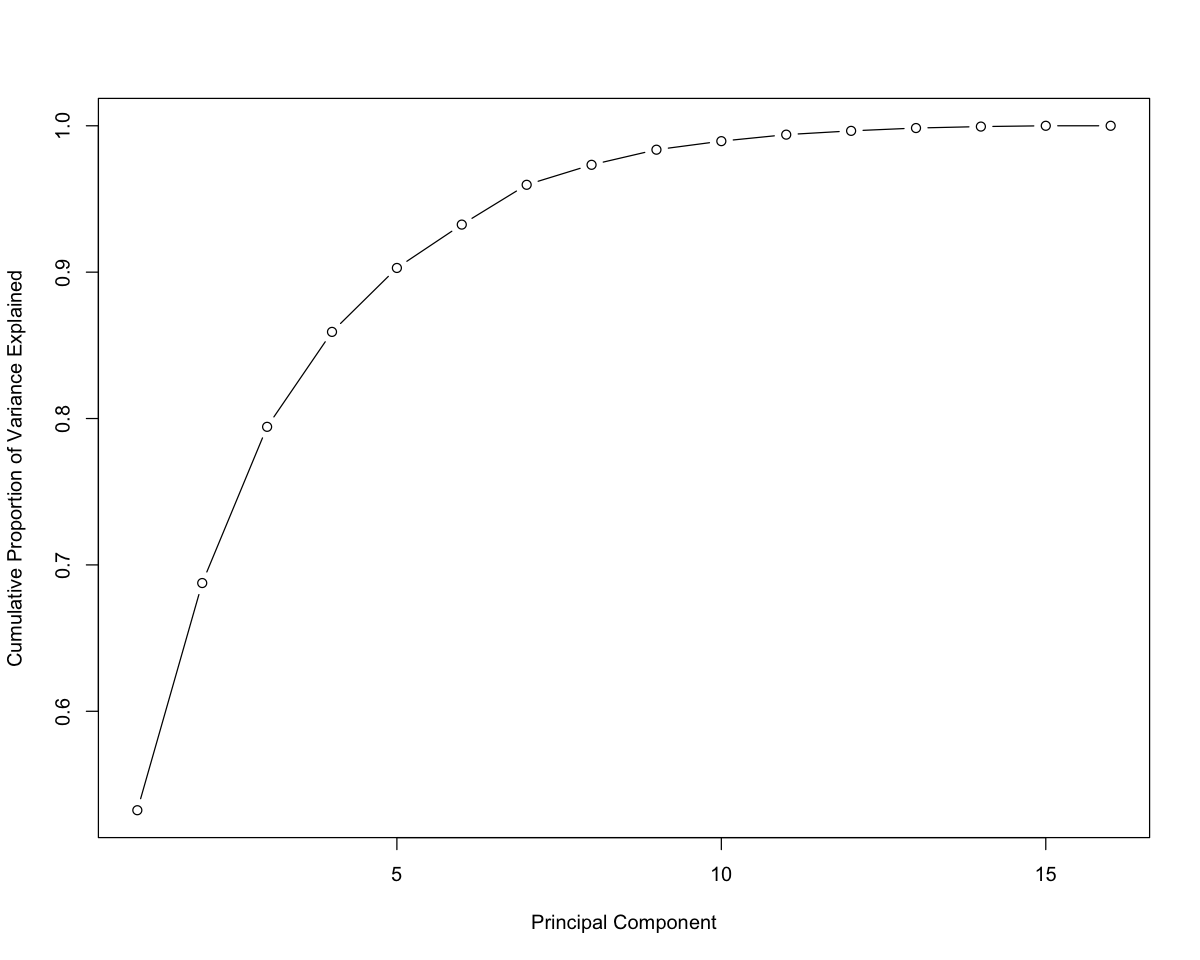

In [23]:
std_dev_prin_comp <- prin_comp$sdev
pr_var_prin_comp <- std_dev_prin_comp^2
prop_varex <- pr_var_prin_comp/sum(pr_var_prin_comp)
prop_varex
plot(prop_varex, xlab = "Principal Component",
             ylab = "Proportion of Variance Explained",
             type = "b")
plot(cumsum(prop_varex), xlab = "Principal Component",
              ylab = "Cumulative Proportion of Variance Explained",
              type = "b")

In [24]:
train.data = data.frame(Choix.A.pc = dat.dep[train,"Choix.A.pc"],prin_comp$x)
train.data <- train.data[,1:6]


The downloaded binary packages are in
	/var/folders/3x/cwyr4h2x1sq1zwzrvjb7bt_80000gn/T//Rtmp6q9Uoa/downloaded_packages


n= 64 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 64 1881.64300 43.62083  
   2) PC5>=0.06856689 28  459.37760 40.67471  
     4) PC1>=-2.260758 21  291.03190 39.48398  
       8) PC3< 0.3041965 10  109.31090 37.49202 *
       9) PC3>=0.3041965 11  105.97060 41.29485 *
     5) PC1< -2.260758 7   49.24651 44.24691 *
   3) PC5< 0.06856689 36  990.21500 45.91225  
     6) PC4< -0.2685564 16  314.78620 43.72736 *
     7) PC4>=-0.2685564 20  537.94480 47.66016  
      14) PC3>=-0.6650028 13  363.23190 46.20483 *
      15) PC3< -0.6650028 7   96.04482 50.36292 *

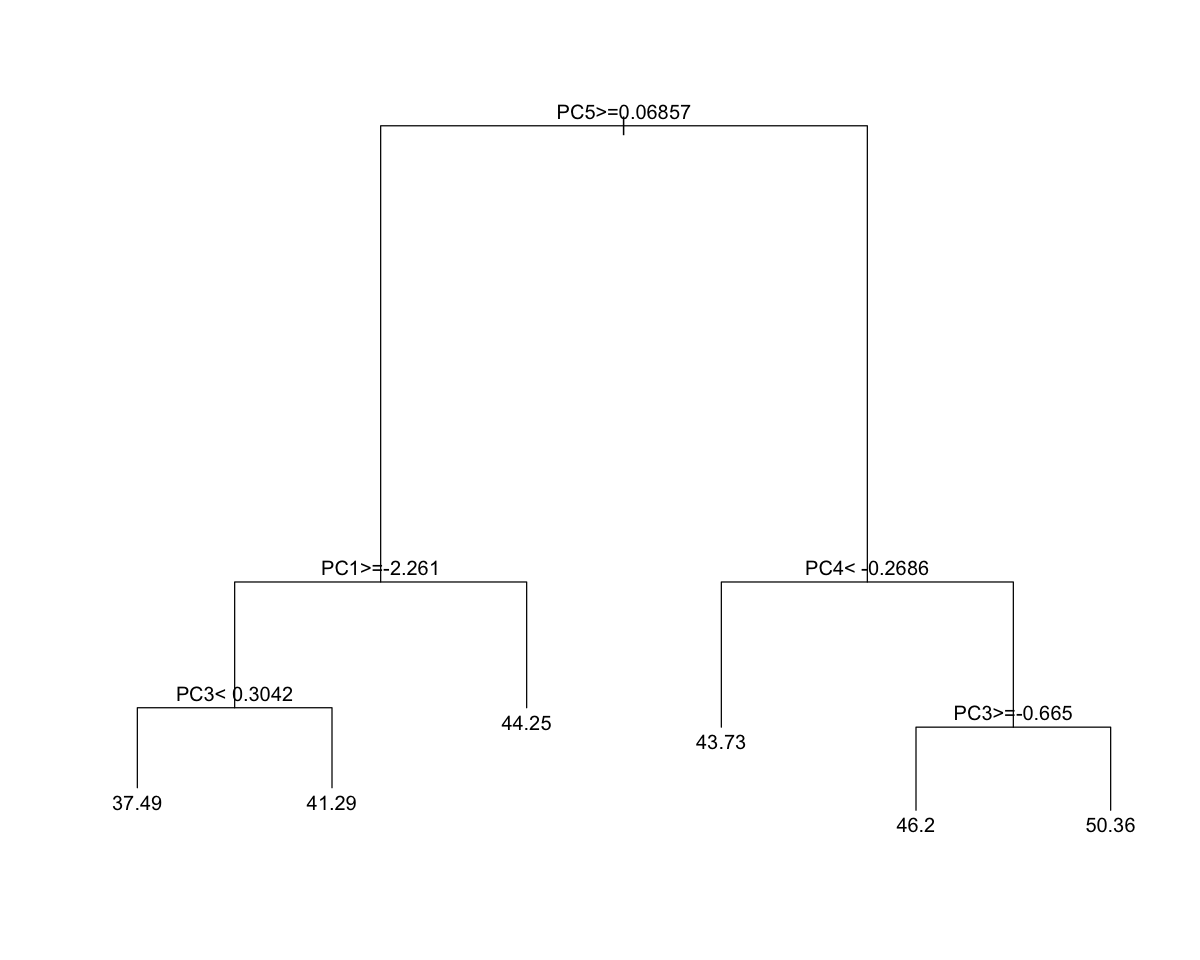

In [25]:
install.packages("rpart")
library(rpart)
rpart.model <- rpart(Choix.A.pc ~ .,data = train.data, method = "anova")
rpart.model
plot(rpart.model)
text(rpart.model)

In [26]:
test = dat.dep[-train,chosen_pca]
test.data = predict(prin_comp, newdata = test)
test.data <- as.data.frame(test.data)
test.data <- test.data[,1:5]
rpart.prediction <- predict(rpart.model, test.data)
#CART analysis

In [27]:
data.frame(rpart.prediction,dat.dep[-train,"Choix.A.pc"])

rpart.prediction dat.dep..train...Choix.A.pc..
3  43.72736         46.80651                     
5  41.29485         44.03240                     
6  37.49202         30.82534                     
8  41.29485         41.49657                     
9  44.24691         56.08238                     
18 37.49202         44.13347                     
27 37.49202         38.67344                     
29 46.20483         50.24015                     
34 43.72736         43.91917                     
40 37.49202         49.05098                     
43 46.20483         41.69980                     
44 43.72736         48.38314                     
45 43.72736         38.45048                     
49 43.72736         40.94933                     
55 41.29485         36.04585                     
56 37.49202         43.31249                     
57 41.29485         37.91953                     
60 41.29485         38.52522                     
63 46.20483         51.00935                     
65 44.24691         52.29365                     
66 43.72736         42.56948                     
67 37.49202         31.22615                     
72 43.72736         42.88505                     
73 41.29485         40.21142                     
75 50.36292         51.04355                     
80 43.72736         42.76699                     
81 46.20483         46.75896                     
83 37.49202         31.83510                     
84 46.20483         37.07609                     
88 41.29485         38.43217                     
89 37.49202         37.75993                     
91 37.49202         46.35003

In [28]:
printcp(rpart.model)


Regression tree:
rpart(formula = Choix.A.pc ~ ., data = train.data, method = "anova")

Variables actually used in tree construction:
[1] PC1 PC3 PC4 PC5

Root node error: 1881.6/64 = 29.401

n= 64 

        CP nsplit rel error  xerror    xstd
1 0.229614      0   1.00000 1.01852 0.19387
2 0.073066      1   0.77039 0.88742 0.16315
3 0.063295      2   0.69732 0.94482 0.16859
4 0.041808      3   0.63403 0.99353 0.16916
5 0.040258      4   0.59222 0.95164 0.16032
6 0.010000      5   0.55196 0.93994 0.15406


In [29]:
summary(rpart.model,cp = 0.06)

Call:
rpart(formula = Choix.A.pc ~ ., data = train.data, method = "anova")
  n= 64 

          CP nsplit rel error    xerror      xstd
1 0.22961353      0 1.0000000 1.0185192 0.1938651
2 0.07306589      1 0.7703865 0.8874204 0.1631509
3 0.06329528      2 0.6973206 0.9448181 0.1685877
4 0.04180821      3 0.6340253 0.9935342 0.1691610
5 0.04025762      4 0.5922171 0.9516377 0.1603211
6 0.01000000      5 0.5519595 0.9399417 0.1540600

Variable importance
PC5 PC4 PC1 PC3 PC2 
 38  20  19  18   5 

Node number 1: 64 observations,    complexity param=0.2296135
  mean=43.62083, MSE=29.40068 
  left son=2 (28 obs) right son=3 (36 obs)
  Primary splits:
      PC5 < 0.06856689  to the right, improve=0.22961350, (0 missing)
      PC1 < -2.329122   to the right, improve=0.08774912, (0 missing)
      PC2 < 0.7167898   to the right, improve=0.07576449, (0 missing)
      PC4 < 0.9963841   to the right, improve=0.07273318, (0 missing)
      PC3 < -0.9520358  to the right, improve=0.06939787, (0 missin

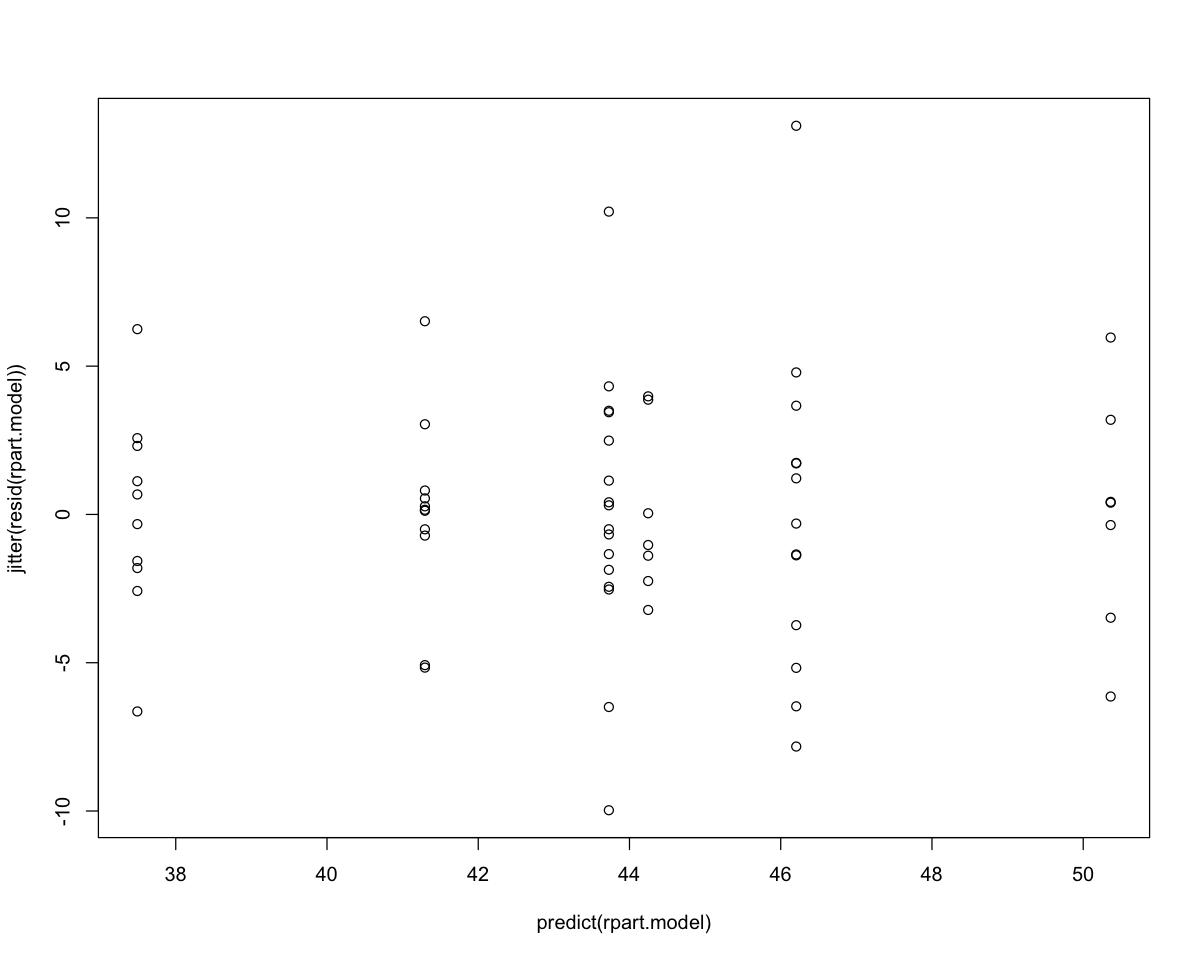

In [31]:
plot(predict(rpart.model),jitter(resid(rpart.model)))

In [32]:
resid(rpart.model)

1           2           4           7          10          11 
-5.08020703 -0.71138014  0.03812094 -1.35035796 -9.97392804  1.21645382 
         12          13          14          15          16          17 
-0.30607797 -2.53261192  0.30600281 -1.03003598  3.86990223 -0.67286934 
         19          2A          2B          21          22          23 
 5.96623969 -1.80920990  2.30940296 -3.22204367 -0.35804448  4.78680947 
         24          25          26          28          30          31 
 3.66766490  0.12486269  0.54027852  0.67532247 -5.17269365  0.39782990 
         32          33          35          36          37          38 
 1.73825216  4.31783912  3.44582617  1.13834740 -0.49757744 -1.38079939 
         39          41          42          46          47          48 
 0.27161113  1.11903286 -2.43892331  3.19016260 -1.33884088 -2.24395335 
         50          51          52          53          54          58 
-0.50223845 -1.56822870 -5.16323501 -7.82626223  6.24706048  3.98121038 
         59          61          62          64          68          69 
 0.41000942 -0.32568473  3.03876774 -3.48073460 -6.64234241 -1.86716635 
         70          71          74          76          77          78 
-6.46988472 -1.39320055 -2.57989320  2.49043600  0.80763857  2.57454017 
         79          82          85          86          87          90 
 1.72246365 -3.73205127 -6.49491859  3.49678649 10.21158846  0.15837982 
         92          93          94          95 
-6.13922695 13.10648320  0.42377384  6.51552216